***Exp-4: Tuning the Neural Network performance with hyper parameters***

In [ ]:
import numpy 
import pandas 
import matplotlib.pyplot as plt

Upload the dataset

In [ ]:
from google.colab import files
dataset=files.upload()

Saving Mobile_Price_Classification_train.csv to Mobile_Price_Classification_train.csv


Store the dataset as a dataframe

In [ ]:
df=pandas.read_csv('Mobile_Price_Classification_train.csv')

Display the dataframe

In [ ]:
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

Understand your data

In [ ]:
df.shape

(2000, 21)

Separate the attributes and the label

In [ ]:
data=df.drop(['price_range'],axis=1)
label=df['price_range']
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
datasets=train_test_split(data,label,test_size=0.2)
train_data,test_data,train_label,test_label=datasets
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)

(1600, 20)
(400, 20)
(1600,)


Data preprocessing using Keras

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


Normalize training data

In [ ]:
layer=tf.keras.layers.Normalization()
layer.adapt(train_data)
normalized_train_data=layer(train_data)
print(normalized_train_data)

tf.Tensor(
[[-1.1522574  -0.97897094  0.70332086 ...  0.5465355   0.9851106
   0.9900496 ]
 [-1.6109338  -0.97897094  0.2120787  ...  0.5465355   0.9851106
  -1.0100505 ]
 [-1.218107    1.0214807  -1.0160272  ...  0.5465355   0.9851106
   0.9900496 ]
 ...
 [ 0.80279404  1.0214807   0.8261316  ...  0.5465355   0.9851106
  -1.0100505 ]
 [-1.211295   -0.97897094  0.8261316  ...  0.5465355   0.9851106
   0.9900496 ]
 [-0.4438067  -0.97897094  0.8261316  ...  0.5465355  -1.0151144
  -1.0100505 ]], shape=(1600, 20), dtype=float32)


In [ ]:
print("Features mean: %.2f" % (normalized_train_data.numpy().mean()))
print("Features std: %.2f" % (normalized_train_data.numpy().std()))

Features mean: -0.00
Features std: 1.00


Convert tensor to numpy array

In [ ]:
norm_train_data=normalized_train_data.numpy()

Convert NumPy array to Dataframe

In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
norm_dataframe=pandas.DataFrame(norm_train_data,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

In [ ]:
print(norm_dataframe)

      battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0         -1.152257 -0.978971     0.703321  0.968011 -0.981654  0.948809   
1         -1.610934 -0.978971     0.212079 -1.033046  1.764233  0.948809   
2         -1.218107  1.021481    -1.016027 -1.033046  0.620113 -1.053953   
3         -1.472423  1.021481     0.948942  0.968011 -0.752830 -1.053953   
4         -0.845716 -0.978971     1.685806 -1.033046  0.162465 -1.053953   
...             ...       ...          ...       ...       ...       ...   
1595      -1.649535 -0.978971    -1.016027  0.968011 -0.752830  0.948809   
1596      -0.736724 -0.978971     0.212079  0.968011 -0.752830  0.948809   
1597       0.802794  1.021481     0.826132 -1.033046 -0.295183  0.948809   
1598      -1.211295 -0.978971     0.826132  0.968011 -0.066359 -1.053953   
1599      -0.443807 -0.978971     0.826132 -1.033046  2.450705  0.948809   

      int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
0      -1.54671

Normalize test data

In [ ]:
layer=tf.keras.layers.Normalization()
layer.adapt(test_data)
norm_test_data=layer(test_data)

Convert tensor to numpy array

In [ ]:
norm_test_data_arr=norm_test_data.numpy()

Convert numpy array to dataframe

In [ ]:
norm_test_dataframe=pandas.DataFrame(norm_test_data_arr,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
print(norm_test_dataframe)

     battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0        -0.847987 -1.035634    -0.245858 -0.965592  0.145208 -1.005013   
1        -1.225087  0.965592    -1.219554 -0.965592  0.382281 -1.005013   
2         1.258256 -1.035634     1.214686  1.035635  1.093503 -1.005013   
3         0.241925  0.965592     0.606126  1.035635  0.145208 -1.005013   
4         0.398283  0.965592     0.362702  1.035635 -1.040161 -1.005013   
..             ...       ...          ...       ...       ...       ...   
395      -0.772107  0.965592     1.336398  1.035635  0.619355 -1.005013   
396       1.329537 -1.035634    -0.732706 -0.965592  1.093503  0.995012   
397      -0.459390  0.965592    -1.219554 -0.965592  0.619355 -1.005013   
398       1.451404  0.965592     1.458110  1.035635  1.330576 -1.005013   
399      -1.443529  0.965592    -1.219554  1.035635 -1.040161 -1.005013   

     int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0     -1.320426  0

Multi layer neural network using Keras

In [ ]:
import keras.api._v2.keras as keras
from keras import layers
callback =keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)
model_1= keras.Sequential()

SGD

In [ ]:
model_1.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_1.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_1.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_1.add(tf.keras.layers.Dense(units=4,activation='softmax'))

Configure the learning process of the model

In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy']
              )

In [ ]:
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                357       
                                                                 
 dense_1 (Dense)             (None, 12)                216       
                                                                 
 dense_2 (Dense)             (None, 7)                 91        
                                                                 
 dense_3 (Dense)             (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


Iterate on your training data in batches

In [ ]:
Y_train = tf.one_hot(train_label, 4)
Y_test=tf.one_hot(test_label,4)
history_1=model_1.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test),callbacks=[callback])

Epoch 1/200
160/160 [==============================] - 1s 5ms/step - loss: 1.3988 - accuracy: 0.2606 - val_loss: 1.3822 - val_accuracy: 0.2675
Epoch 2/200
160/160 [==============================] - 0s 3ms/step - loss: 1.3759 - accuracy: 0.2663 - val_loss: 1.3625 - val_accuracy: 0.2925
Epoch 3/200
160/160 [==============================] - 0s 1ms/step - loss: 1.3594 - accuracy: 0.2887 - val_loss: 1.3472 - val_accuracy: 0.3000
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3463 - accuracy: 0.3069 - val_loss: 1.3343 - val_accuracy: 0.3275
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3347 - accuracy: 0.3219 - val_loss: 1.3225 - val_accuracy: 0.3525
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3238 - accuracy: 0.3375 - val_loss: 1.3113 - val_accuracy: 0.3800
Epoch 7/200
160/160 [==============================] - 0s 1ms/step - loss: 1.3135 - accuracy: 0.3494 - val_loss: 1.3004 - val_accuracy: 0.3850

Evaluate your test loss and metrics 

In [ ]:
Y_test=tf.one_hot(test_label,4)
history_test=model_1.evaluate(norm_test_dataframe,Y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.2592 - accuracy: 0.8900


Predict for the given input

In [ ]:
model_1.predict(norm_test_data_arr)

array([[6.56238854e-01, 3.43760461e-01, 7.08202435e-07, 2.75631162e-14],
       [1.46874144e-33, 6.08564360e-13, 3.24062700e-03, 9.96759355e-01],
       [9.41546440e-01, 5.84536120e-02, 3.14116129e-08, 8.34154341e-16],
       ...,
       [6.83685101e-27, 1.15536476e-10, 3.16452282e-03, 9.96835530e-01],
       [6.38628669e-19, 6.96374218e-06, 7.71245897e-01, 2.28747115e-01],
       [7.28401065e-01, 2.71420747e-01, 1.78308808e-04, 1.40033345e-08]],
      dtype=float32)

RMSprop

In [ ]:
model_2= keras.Sequential()
model_2.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_2.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_2.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_2.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 17)                357       
                                                                 
 dense_5 (Dense)             (None, 12)                216       
                                                                 
 dense_6 (Dense)             (None, 7)                 91        
                                                                 
 dense_7 (Dense)             (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_2=model_2.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test),callbacks=[callback])

Epoch 1/200
160/160 [==============================] - 2s 5ms/step - loss: 1.3854 - accuracy: 0.3075 - val_loss: 1.3641 - val_accuracy: 0.3300
Epoch 2/200
160/160 [==============================] - 0s 3ms/step - loss: 1.3236 - accuracy: 0.3725 - val_loss: 1.3159 - val_accuracy: 0.3850
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 1.2262 - accuracy: 0.4256 - val_loss: 1.1940 - val_accuracy: 0.4050
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0499 - accuracy: 0.4819 - val_loss: 1.0090 - val_accuracy: 0.4350
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.5462 - val_loss: 0.7847 - val_accuracy: 0.5350
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7175 - val_loss: 0.5990 - val_accuracy: 0.7675
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.8406 - val_loss: 0.4636 - val_accuracy: 0.8125

Adam

In [ ]:
model_3= keras.Sequential()
model_3.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_3.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_3.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_3.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 17)                357       
                                                                 
 dense_5 (Dense)             (None, 12)                216       
                                                                 
 dense_6 (Dense)             (None, 7)                 91        
                                                                 
 dense_7 (Dense)             (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_3=model_3.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9862 - val_loss: 0.2468 - val_accuracy: 0.9125
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9894 - val_loss: 0.2801 - val_accuracy: 0.9125
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9912 - val_loss: 0.2752 - val_accuracy: 0.9050
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9925 - val_loss: 0.2927 - val_accuracy: 0.9025
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9925 - val_loss: 0.2992 - val_accuracy: 0.9000
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9956 - val_loss: 0.2909 - val_accuracy: 0.8975
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9944 - val_loss: 0.2821 - val_accuracy: 0.9025

Adagrad

In [ ]:
model_4= keras.Sequential()
model_4.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_4.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_4.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_4.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_4.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 17)                357       
                                                                 
 dense_9 (Dense)             (None, 12)                216       
                                                                 
 dense_10 (Dense)            (None, 7)                 91        
                                                                 
 dense_11 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_4=model_4.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3849 - accuracy: 0.2338 - val_loss: 1.3754 - val_accuracy: 0.2325
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3846 - accuracy: 0.2331 - val_loss: 1.3753 - val_accuracy: 0.2325
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3844 - accuracy: 0.2319 - val_loss: 1.3751 - val_accuracy: 0.2325
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3841 - accuracy: 0.2313 - val_loss: 1.3750 - val_accuracy: 0.2350
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3838 - accuracy: 0.2319 - val_loss: 1.3749 - val_accuracy: 0.2375
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3836 - accuracy: 0.2313 - val_loss: 1.3747 - val_accuracy: 0.2375
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3833 - accuracy: 0.2319 - val_loss: 1.3746 - val_accuracy: 0.2375

Plot accuracy for various optimizers

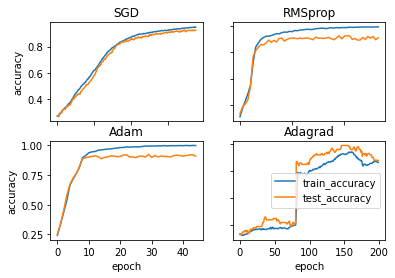

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history_1.history['accuracy'],label='train_accuracy')
axs[0, 0].plot(history_1.history['val_accuracy'],label='test_accuracy')
axs[0, 0].set_title('SGD')
axs[0, 1].plot(history_2.history['accuracy'],label='train_accuracy')
axs[0, 1].plot(history_2.history['val_accuracy'],label='test_accuracy')
axs[0, 1].set_title('RMSprop')
axs[1, 0].plot(history_3.history['accuracy'],label='train_accuracy')
axs[1, 0].plot(history_3.history['val_accuracy'],label='test_accuracy')
axs[1, 0].set_title('Adam')
axs[1, 1].plot(history_4.history['accuracy'],label='train_accuracy')
axs[1, 1].plot(history_4.history['val_accuracy'],label='test_accuracy')
axs[1, 1].set_title('Adagrad')
plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Plot the loss for various optimizers

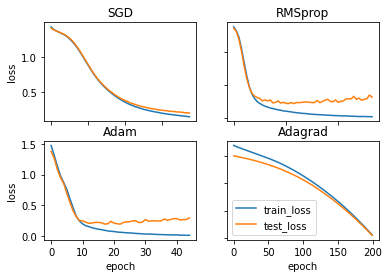

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history_1.history['loss'],label='train_loss')
axs[0, 0].plot(history_1.history['val_loss'],label='test_loss')
axs[0, 0].set_title('SGD')
axs[0, 1].plot(history_2.history['loss'],label='train_loss')
axs[0, 1].plot(history_2.history['val_loss'],label='test_loss')
axs[0, 1].set_title('RMSprop')
axs[1, 0].plot(history_3.history['loss'],label='train_loss')
axs[1, 0].plot(history_3.history['val_loss'],label='test_loss')
axs[1, 0].set_title('Adam')
axs[1, 1].plot(history_4.history['loss'],label='train_loss')
axs[1, 1].plot(history_4.history['val_loss'],label='test_loss')
axs[1, 1].set_title('Adagrad')
plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Architecture-2

In [ ]:
model_5= keras.Sequential()
model_5.add(tf.keras.layers.Dense(units=32,input_shape=(20,),activation='relu'))
model_5.add(tf.keras.layers.Dense(units=16,activation='relu'))
model_5.add(tf.keras.layers.Dense(units=8,activation='relu'))
model_5.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_5.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_5.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                672       
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 4)                 36        
                                                                 
Total params: 1,372
Trainable params: 1,372
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_5=model_5.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 1s 3ms/step - loss: 1.2739 - accuracy: 0.3681 - val_loss: 1.1144 - val_accuracy: 0.4675
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.8876 - accuracy: 0.5987 - val_loss: 0.7028 - val_accuracy: 0.6900
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.8275 - val_loss: 0.4274 - val_accuracy: 0.8550
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8988 - val_loss: 0.3363 - val_accuracy: 0.8400
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9125 - val_loss: 0.2785 - val_accuracy: 0.8800
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9375 - val_loss: 0.2600 - val_accuracy: 0.8850
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9431 - val_loss: 0.2342 - val_accuracy: 0.9075

Architecture-3

In [ ]:
model_6= keras.Sequential()
model_6.add(tf.keras.layers.Dense(units=24,input_shape=(20,),activation='relu'))
model_6.add(tf.keras.layers.Dense(units=16,activation='relu'))
model_6.add(tf.keras.layers.Dense(units=8,activation='relu'))
model_6.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_6.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_6.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 24)                504       
                                                                 
 dense_37 (Dense)            (None, 16)                400       
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dense_39 (Dense)            (None, 4)                 36        
                                                                 
Total params: 1,076
Trainable params: 1,076
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_6=model_6.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 0s 2ms/step - loss: 1.7494e-07 - accuracy: 1.0000 - val_loss: 0.7160 - val_accuracy: 0.9250
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 1.5713e-07 - accuracy: 1.0000 - val_loss: 0.7205 - val_accuracy: 0.9225
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3113e-07 - accuracy: 1.0000 - val_loss: 0.7193 - val_accuracy: 0.9250
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 1.2495e-07 - accuracy: 1.0000 - val_loss: 0.7237 - val_accuracy: 0.9200
Epoch 5/200
160/160 [==============================] - 0s 3ms/step - loss: 1.1683e-07 - accuracy: 1.0000 - val_loss: 0.7268 - val_accuracy: 0.9225
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.1012e-07 - accuracy: 1.0000 - val_loss: 0.7487 - val_accuracy: 0.9225
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 9.9391e-08 - accuracy: 1.0000 - val_loss: 0

Architecture-4

In [ ]:
model_7= keras.Sequential()
model_7.add(tf.keras.layers.Dense(units=20,input_shape=(20,),activation='relu'))
model_7.add(tf.keras.layers.Dense(units=16,activation='relu'))
model_7.add(tf.keras.layers.Dense(units=8,activation='relu'))
model_7.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_7.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
print(model_7.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 20)                420       
                                                                 
 dense_41 (Dense)            (None, 16)                336       
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dense_43 (Dense)            (None, 4)                 36        
                                                                 
Total params: 928
Trainable params: 928
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_7=model_7.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 2s 6ms/step - loss: 1.3469 - accuracy: 0.3363 - val_loss: 1.2563 - val_accuracy: 0.4400
Epoch 2/200
160/160 [==============================] - 1s 5ms/step - loss: 1.1059 - accuracy: 0.5250 - val_loss: 0.9448 - val_accuracy: 0.5575
Epoch 3/200
160/160 [==============================] - 1s 3ms/step - loss: 0.7651 - accuracy: 0.6594 - val_loss: 0.6456 - val_accuracy: 0.7000
Epoch 4/200
160/160 [==============================] - 1s 4ms/step - loss: 0.5346 - accuracy: 0.7806 - val_loss: 0.4698 - val_accuracy: 0.8150
Epoch 5/200
160/160 [==============================] - 1s 5ms/step - loss: 0.4024 - accuracy: 0.8494 - val_loss: 0.4000 - val_accuracy: 0.8425
Epoch 6/200
160/160 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.8806 - val_loss: 0.3288 - val_accuracy: 0.8850
Epoch 7/200
160/160 [==============================] - 1s 5ms/step - loss: 0.2636 - accuracy: 0.9019 - val_loss: 0.2814 - val_accuracy: 0.8900

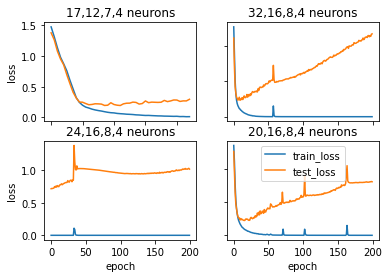

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history_3.history['loss'],label='train_loss')
axs[0, 0].plot(history_3.history['val_loss'],label='test_loss')
axs[0, 0].set_title('17,12,7,4 neurons')
axs[0, 1].plot(history_5.history['loss'],label='train_loss')
axs[0, 1].plot(history_5.history['val_loss'],label='test_loss')
axs[0, 1].set_title('32,16,8,4 neurons')
axs[1, 0].plot(history_6.history['loss'],label='train_loss')
axs[1, 0].plot(history_6.history['val_loss'],label='test_loss')
axs[1, 0].set_title('24,16,8,4 neurons')
axs[1, 1].plot(history_7.history['loss'],label='train_loss')
axs[1, 1].plot(history_7.history['val_loss'],label='test_loss')
axs[1, 1].set_title('20,16,8,4 neurons')

plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Plot the accuracy of the 4 different architectures

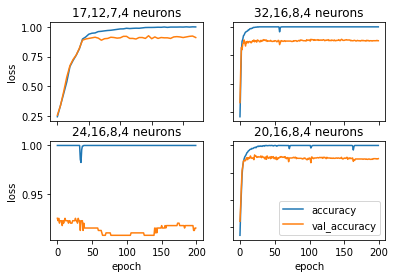

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history_3.history['accuracy'],label='accuracy')
axs[0, 0].plot(history_3.history['val_accuracy'],label='val_accuracy')
axs[0, 0].set_title('17,12,7,4 neurons')
axs[0, 1].plot(history_5.history['accuracy'],label='accuracy')
axs[0, 1].plot(history_5.history['val_accuracy'],label='val_accuracy')
axs[0, 1].set_title('32,16,8,4 neurons')
axs[1, 0].plot(history_6.history['accuracy'],label='accuracy')
axs[1, 0].plot(history_6.history['val_accuracy'],label='val_accuracy')
axs[1, 0].set_title('24,16,8,4 neurons')
axs[1, 1].plot(history_7.history['accuracy'],label='accuracy')
axs[1, 1].plot(history_7.history['val_accuracy'],label='val_accuracy')
axs[1, 1].set_title('20,16,8,4 neurons')

plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Adam_learning_rate=1e-4

In [ ]:
model_8= keras.Sequential()
model_8.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_8.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_8.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_8.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_8.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])
print(model_8.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 17)                357       
                                                                 
 dense_13 (Dense)            (None, 12)                216       
                                                                 
 dense_14 (Dense)            (None, 7)                 91        
                                                                 
 dense_15 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_8=model_8.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 1.4198 - accuracy: 0.2825 - val_loss: 1.4046 - val_accuracy: 0.2950
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4042 - accuracy: 0.3044 - val_loss: 1.3914 - val_accuracy: 0.3150
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3907 - accuracy: 0.3181 - val_loss: 1.3795 - val_accuracy: 0.3250
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3782 - accuracy: 0.3356 - val_loss: 1.3682 - val_accuracy: 0.3475
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3662 - accuracy: 0.3525 - val_loss: 1.3572 - val_accuracy: 0.3600
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3540 - accuracy: 0.3663 - val_loss: 1.3462 - val_accuracy: 0.3725
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 1.3418 - accuracy: 0.3919 - val_loss: 1.3339 - val_accuracy: 0.3900

Adam_learning_rate=1e-5

In [ ]:
model_9= keras.Sequential()
model_9.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_9.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_9.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_9.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_9.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])
print(model_9.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 17)                357       
                                                                 
 dense_17 (Dense)            (None, 12)                216       
                                                                 
 dense_18 (Dense)            (None, 7)                 91        
                                                                 
 dense_19 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_9=model_9.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 1s 3ms/step - loss: 1.5024 - accuracy: 0.2125 - val_loss: 1.4630 - val_accuracy: 0.2225
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4964 - accuracy: 0.2150 - val_loss: 1.4584 - val_accuracy: 0.2250
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4907 - accuracy: 0.2163 - val_loss: 1.4539 - val_accuracy: 0.2225
Epoch 4/200
160/160 [==============================] - 0s 1ms/step - loss: 1.4853 - accuracy: 0.2188 - val_loss: 1.4496 - val_accuracy: 0.2250
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4801 - accuracy: 0.2175 - val_loss: 1.4456 - val_accuracy: 0.2325
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4752 - accuracy: 0.2212 - val_loss: 1.4417 - val_accuracy: 0.2425
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4705 - accuracy: 0.2225 - val_loss: 1.4380 - val_accuracy: 0.2450

Adam_learning_rate=1e-6

In [ ]:
model_10= keras.Sequential()
model_10.add(tf.keras.layers.Dense(units=17,input_shape=(20,),activation='relu'))
model_10.add(tf.keras.layers.Dense(units=12,activation='relu'))
model_10.add(tf.keras.layers.Dense(units=7,activation='relu'))
model_10.add(tf.keras.layers.Dense(units=4,activation='softmax'))
model_10.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
              metrics=['accuracy'])
print(model_9.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 17)                357       
                                                                 
 dense_17 (Dense)            (None, 12)                216       
                                                                 
 dense_18 (Dense)            (None, 7)                 91        
                                                                 
 dense_19 (Dense)            (None, 4)                 32        
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_10=model_10.fit(norm_train_data,Y_train,epochs=200,batch_size=10,validation_data=(norm_test_data_arr,Y_test))

Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 1.4655 - accuracy: 0.2556 - val_loss: 1.4734 - val_accuracy: 0.2275
Epoch 2/200
160/160 [==============================] - 0s 1ms/step - loss: 1.4651 - accuracy: 0.2556 - val_loss: 1.4730 - val_accuracy: 0.2275
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4648 - accuracy: 0.2556 - val_loss: 1.4727 - val_accuracy: 0.2275
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4644 - accuracy: 0.2556 - val_loss: 1.4724 - val_accuracy: 0.2275
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4640 - accuracy: 0.2556 - val_loss: 1.4721 - val_accuracy: 0.2275
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4637 - accuracy: 0.2550 - val_loss: 1.4717 - val_accuracy: 0.2275
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4633 - accuracy: 0.2550 - val_loss: 1.4714 - val_accuracy: 0.2275

Plot the loss for various learning rates of Adam optimiser

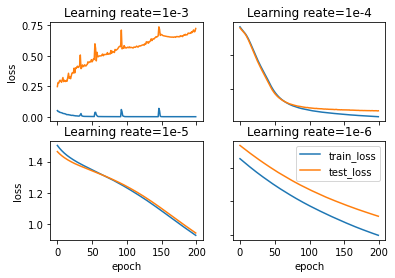

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history_3.history['loss'],label='train_loss')
axs[0, 0].plot(history_3.history['val_loss'],label='test_loss')
axs[0, 0].set_title('Learning reate=1e-3')
axs[0, 1].plot(history_8.history['loss'],label='train_loss')
axs[0, 1].plot(history_8.history['val_loss'],label='test_loss')
axs[0, 1].set_title('Learning reate=1e-4')
axs[1, 0].plot(history_9.history['loss'],label='train_loss')
axs[1, 0].plot(history_9.history['val_loss'],label='test_loss')
axs[1, 0].set_title('Learning reate=1e-5')
axs[1, 1].plot(history_10.history['loss'],label='train_loss')
axs[1, 1].plot(history_10.history['val_loss'],label='test_loss')
axs[1, 1].set_title('Learning reate=1e-6')

plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Plot the accuracy for various learning rates of Adam optimiser

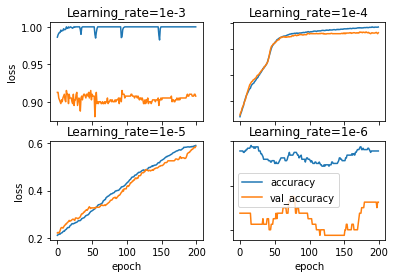

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history_3.history['accuracy'],label='accuracy')
axs[0, 0].plot(history_3.history['val_accuracy'],label='val_accuracy')
axs[0, 0].set_title('Learning_rate=1e-3')
axs[0, 1].plot(history_8.history['accuracy'],label='accuracy')
axs[0, 1].plot(history_8.history['val_accuracy'],label='val_accuracy')
axs[0, 1].set_title('Learning_rate=1e-4')
axs[1, 0].plot(history_9.history['accuracy'],label='accuracy')
axs[1, 0].plot(history_9.history['val_accuracy'],label='val_accuracy')
axs[1, 0].set_title('Learning_rate=1e-5')
axs[1, 1].plot(history_10.history['accuracy'],label='accuracy')
axs[1, 1].plot(history_10.history['val_accuracy'],label='val_accuracy')
axs[1, 1].set_title('Learning_rate=1e-6')

plt.legend()

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()